## 0. 라이브러리 import 및 폰트 세팅

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family = "NanumGothic")

## 
## 1. 전처리 - 데이터 불러오기 및 편집 

### 1) 서울시 장소유형별 범죄 건수

In [6]:
# 장소유형별 2018 범죄데이터 불러오기
rd_place = pd.read_csv('../datas/eda/2018년_장소유형별범죄.txt', sep='\t', thousands=",")


# '-'를 0으로 변환
rd_place.replace("-",0, inplace=True)


# 콤마 제거, NaN 0으로 변환, 형변환(obj -> int)
rd_place["유원지"] = rd_place["유원지"].str.replace(",","").replace(np.nan, 0).astype(int)
rd_place["학교"] = rd_place["학교"].str.replace(",","").replace(np.nan, 0).astype(int)
rd_place["금융기관"] = rd_place["금융기관"].str.replace(",","").replace(np.nan, 0).astype(int)


# 데이터프레임 전치
rd_place_tr = rd_place.T


# 데이터프레임 열이름 정리 및 형변환
rd_place_tr.drop(index=["기간", "구분", "계"], inplace=True)
rd_place_tr.columns = ['합계', '살인', '강도', '강간강제추행', '절도', '폭력']

for col in rd_place_tr.columns:
    rd_place_tr[col] = rd_place_tr[col].astype(int)## 

## 
## 2. 전처리 - 데이터프레임 열 추가 및 정규화

In [7]:
# 범죄별, 장소별 비율 (=정규화) 열 추가
rd_place_tr["합계비율"] = rd_place_tr["합계"] / rd_place_tr["합계"].sum() * 100
rd_place_tr["살인비율"] = rd_place_tr["살인"] / rd_place_tr["살인"].sum() * 100
rd_place_tr["강도비율"] = rd_place_tr["강도"] / rd_place_tr["강도"].sum() * 100
rd_place_tr["강간비율"] = rd_place_tr["강간강제추행"] / rd_place_tr["강간강제추행"].sum() * 100
rd_place_tr["절도비율"] = rd_place_tr["절도"] / rd_place_tr["절도"].sum() * 100
rd_place_tr["폭력비율"] = rd_place_tr["폭력"] / rd_place_tr["폭력"].sum() * 100

## 
## 3. 분석 및 시각화

### 1) 시각화

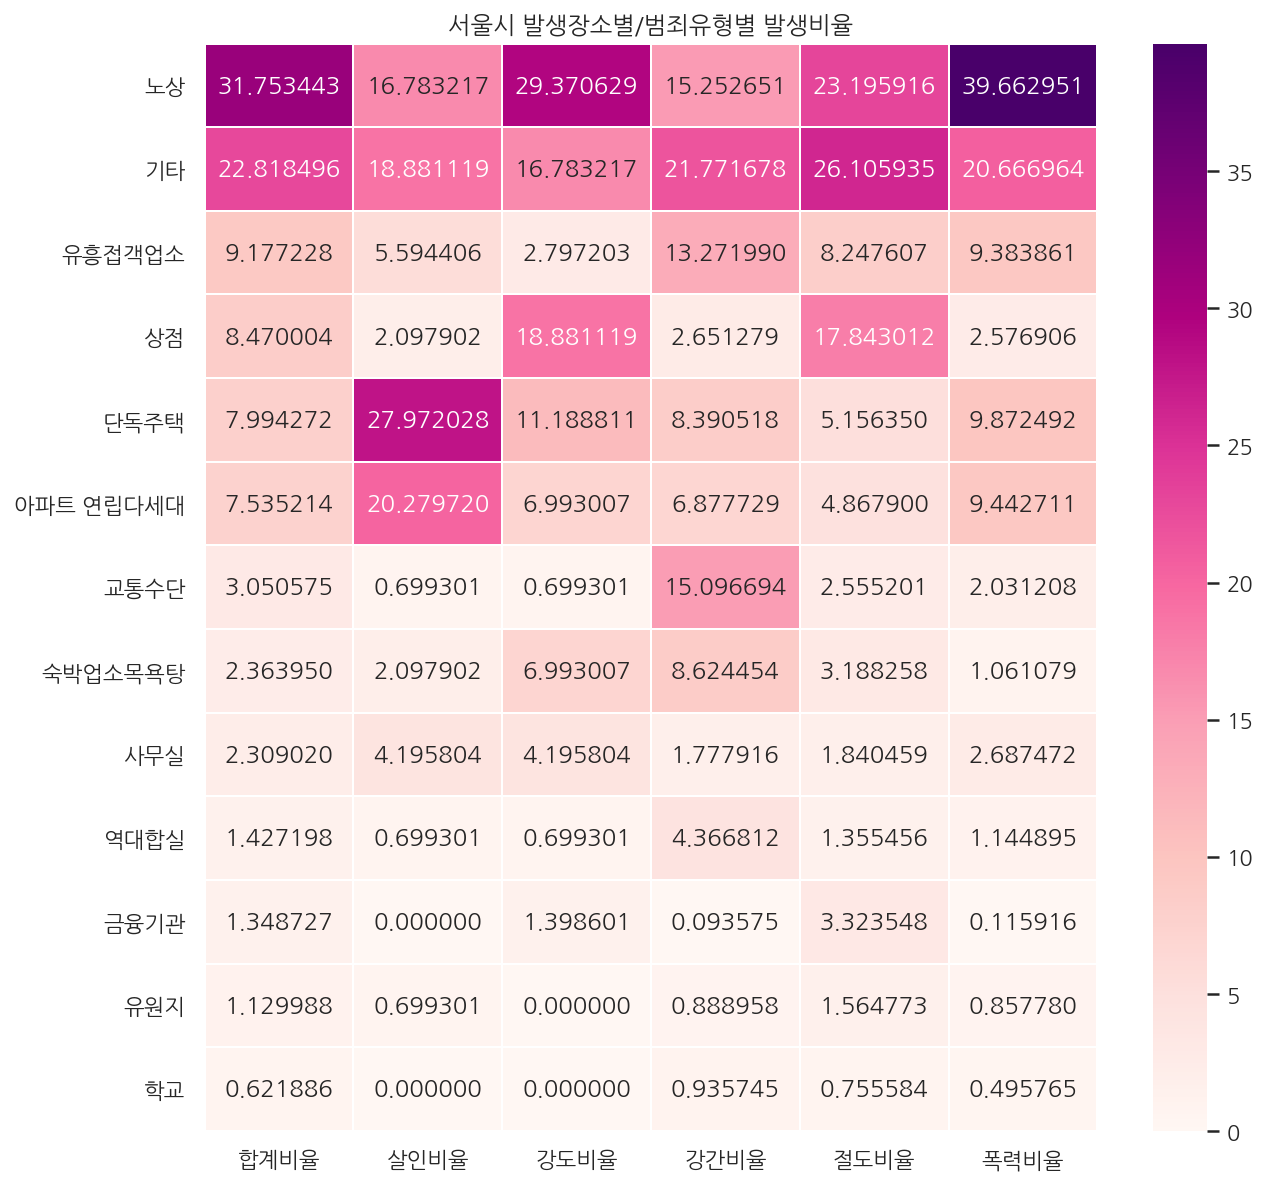

In [9]:
# 장소유형별 범죄비율 heatmap 시각화
target_col = ['합계비율', '살인비율', '강도비율', '강간비율', '절도비율', '폭력비율']

plt.figure(figsize=(10,10))
sns.heatmap(rd_place_tr[target_col].sort_values(by='합계비율', ascending=False),
           annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title("서울시 발생장소별/범죄유형별 발생비율")
plt.show()

```
********************************************************************************************************
범죄 발생은 대체로 노상에서 주로 발생하였으며, 특히 폭력은 그 양상이 더욱 두드러지게 나타났다.
반면, 살인은 노상 비중이 적고, 오히려 단독주택, 아파트 연립다세대 등 주거지역에서 주로 발생하였다.
********************************************************************************************************
```